In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy 

/Users/gamze/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.5 scipy==1.4.1 pandas==0.25.0 scikit-learn==0.21.2 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.0


In [3]:
bresults_file = 'write/bam.h5ad' 
presults_file = 'write/pbam.h5ad' 

In [129]:
bam=sc.read_loom('./bam/output.loom')
bam.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/gamze/miniconda3/lib/python3.7/site-packages/anndata/utils.py:93: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  + str(example_colliding_values)


In [130]:
bam

AnnData object with n_obs × n_vars = 318440 × 58347
    obs: 'antisense_reads', 'cell_barcode_fraction_bases_above_30_mean', 'cell_barcode_fraction_bases_above_30_variance', 'duplicate_reads', 'emptydrops_FDR', 'emptydrops_IsCell', 'emptydrops_Limited', 'emptydrops_LogProb', 'emptydrops_PValue', 'emptydrops_Total', 'fragments_per_molecule', 'fragments_with_single_read_evidence', 'genes_detected_multiple_observations', 'genomic_read_quality_mean', 'genomic_read_quality_variance', 'genomic_reads_fraction_bases_quality_above_30_mean', 'genomic_reads_fraction_bases_quality_above_30_variance', 'molecule_barcode_fraction_bases_above_30_mean', 'molecule_barcode_fraction_bases_above_30_variance', 'molecules_with_single_read_evidence', 'n_fragments', 'n_genes', 'n_molecules', 'n_reads', 'noise_reads', 'perfect_cell_barcodes', 'perfect_molecule_barcodes', 'reads_mapped_exonic', 'reads_mapped_intergenic', 'reads_mapped_intronic', 'reads_mapped_multiple', 'reads_mapped_too_many_loci', 'reads_mappe

normalizing counts per cell
    finished (0:00:00)


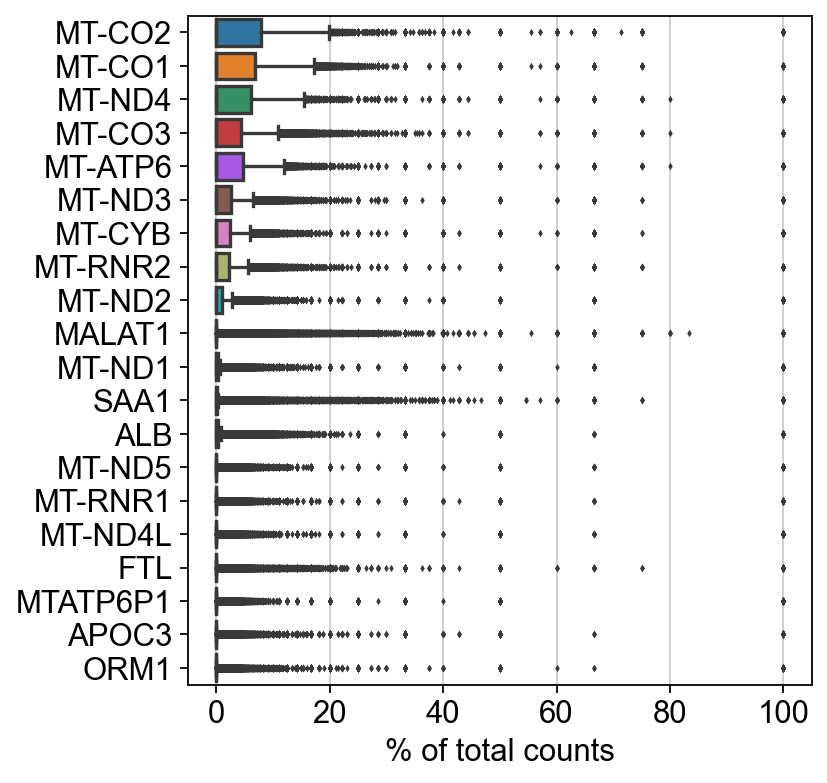

In [131]:
sc.pl.highest_expr_genes(bam, n_top=20, )

In [132]:
sc.pp.filter_cells(bam, min_genes=200)
sc.pp.filter_genes(bam, min_cells=3)

filtered out 314502 cells that have less than 200 genes expressed
filtered out 48187 genes that are detected in less than 3 cells


In [133]:
sc.pp.normalize_total(bam, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [134]:
sc.pp.log1p(bam)

In [135]:
sc.tl.pca(bam, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:01)


In [136]:
bam.write(bresults_file)

In [168]:
sc.pp.neighbors(bam, n_neighbors=100, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [169]:
sc.tl.umap(bam)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [170]:
sc.tl.leiden(bam)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


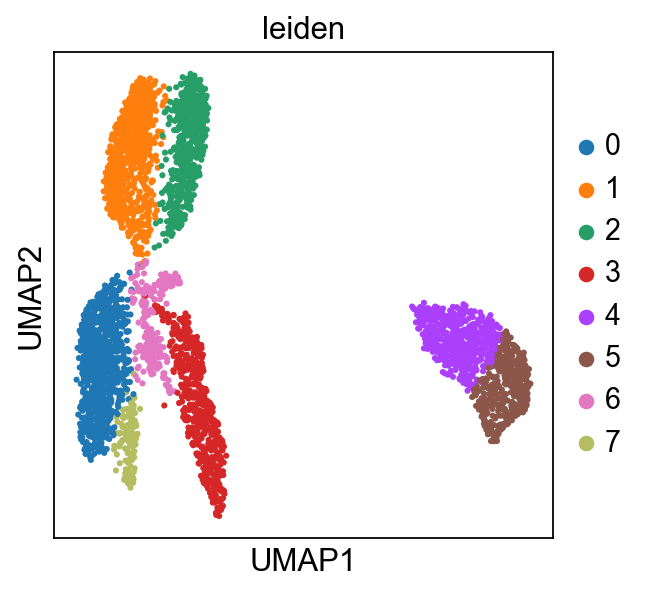

In [178]:
sc.pl.umap(bam, color=['leiden'],save='.pdf')

In [141]:
pbam=sc.read_loom('./pbam/output.loom')
pbam.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/gamze/miniconda3/lib/python3.7/site-packages/anndata/utils.py:93: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  + str(example_colliding_values)


normalizing counts per cell
    finished (0:00:00)


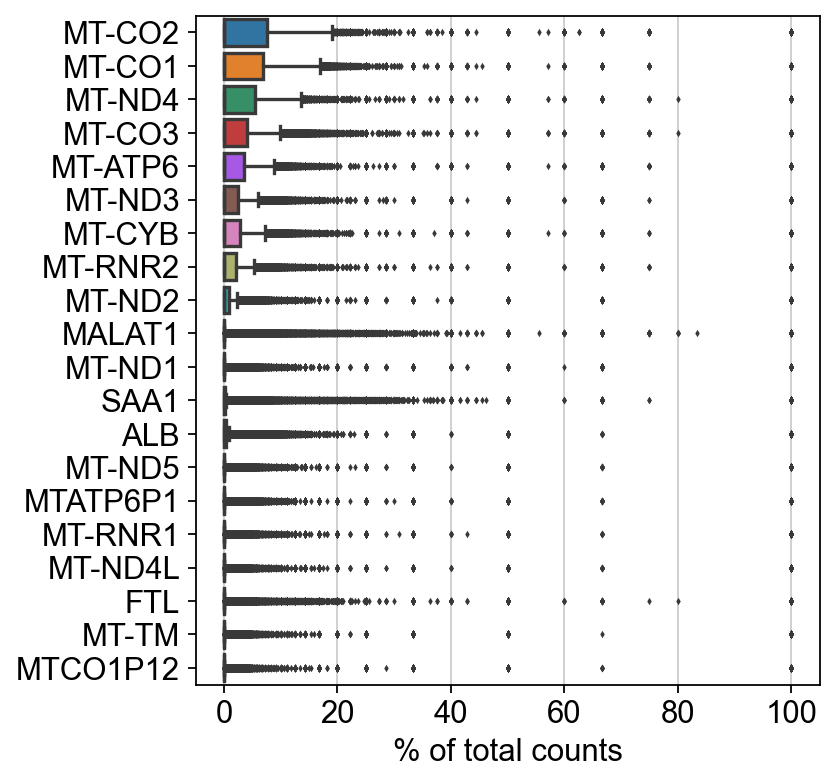

In [142]:
sc.pl.highest_expr_genes(pbam, n_top=20, )

In [143]:
sc.pp.filter_cells(pbam, min_genes=200)
sc.pp.filter_genes(pbam, min_cells=3)

filtered out 315906 cells that have less than 200 genes expressed
filtered out 47993 genes that are detected in less than 3 cells


In [144]:
sc.pp.normalize_total(pbam, target_sum=1e4)
sc.pp.log1p(pbam)

normalizing counts per cell
    finished (0:00:00)


In [145]:
sc.tl.pca(pbam, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:01)


In [146]:
pbam.write(presults_file)

In [173]:
sc.pp.neighbors(pbam, n_neighbors=100, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [174]:
sc.tl.umap(pbam)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [175]:
sc.tl.leiden(pbam)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


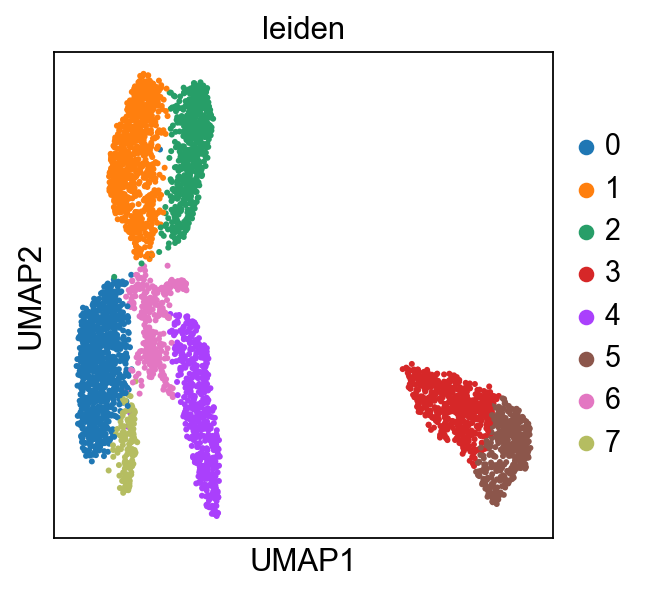

In [179]:
sc.pl.umap(pbam, color=['leiden'],save='.pdf')

In [180]:
bam.var['mt'] = bam.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(bam, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [181]:
pbam.var['mt'] = pbam.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(pbam, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

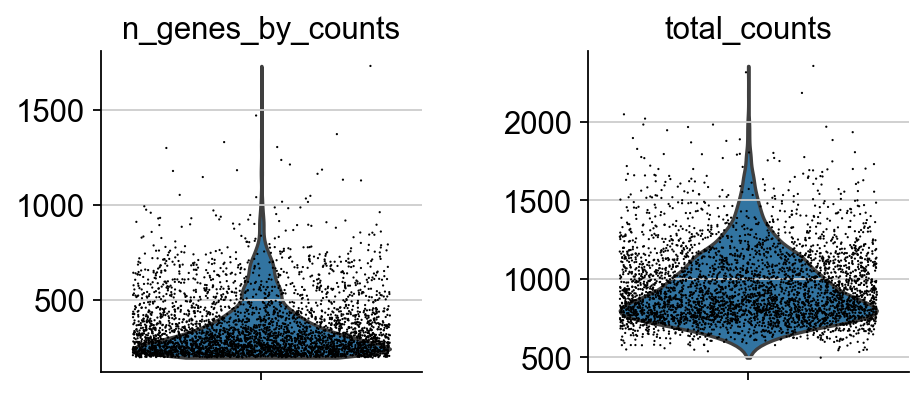

In [184]:
sc.pl.violin(bam, ['n_genes_by_counts', 'total_counts',],
             jitter=0.4, multi_panel=True,save='.pdf')

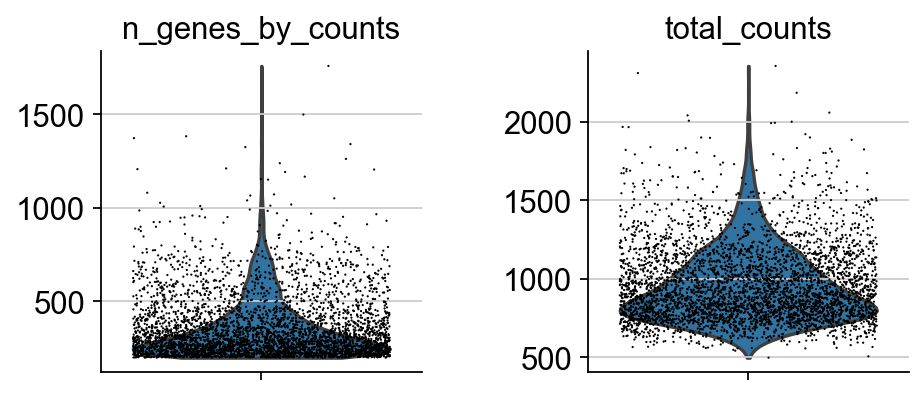

In [185]:
sc.pl.violin(pbam, ['n_genes_by_counts', 'total_counts',],
             jitter=0.4, multi_panel=True,save='.pdf')